# Coursera regression models

In this notebook I will start with implementing a linear univariate regrsssion model, $f_{w,b}$

### Notations

$a$  scalar

$x^{(i)}$, $y^{(i)}$ is the $i_{th}$ Training Example

$m$   Number of training examples

$b$   parameter: bias
    
$w$   parameter: weight
    
$f_{w,b}(x^{(i)})$ Is the result of the model evaluation at $x^{(i)}$ parametized by $w,b$ : $f_{w,b}(x^{(i)}) = wx^{(i)} + b$


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math
#plt.style.use('./deeplearning.mplstyle')

This example will use a simple regression model using two data points: 

In [17]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x train = {x_train}")
print(f"y train = {y_train}")

x train = [1. 2.]
y train = [300. 500.]


Number of training examples/features is denoted by $m$ x_train.shape[0] returns the number of training examples

In [18]:
print(f"Number of training examples: {x_train.shape[0]}")

Number of training examples: 2


We use ($x^{(i)}$, $y^{(i)}$) to denote the $i^{th}$ training example. For instance: 

In [19]:
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i},{y_i})")

(x^(0), y^(0)) = (1.0,300.0)


Text(0.5, 0, 'House sizes in (sqr feet)')

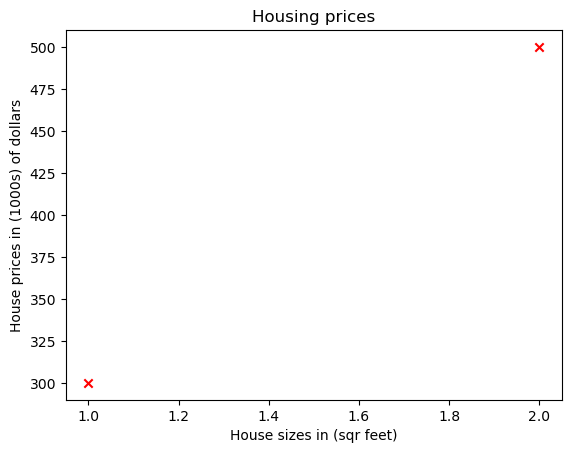

In [20]:
plt.scatter(x_train, y_train,marker='x',c='r')
plt.title("Housing prices")
plt.ylabel("House prices in (1000s) of dollars")
plt.xlabel("House sizes in (sqr feet)")

**w** and **b** are weights and bias: lets's try to see their effect on a regression model

In [21]:
w = 200
b = 100

In [22]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
         x (ndarray(m,)): Data, m examples
         w, b (scalar)  : model parameters
         
     Returns
         f_wb (ndarray(m,)): model prediction
    
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb    
    

In [23]:
tmp_f_wb = compute_model_output(x_train, w, b)

In [24]:
tmp_f_wb

array([300., 500.])

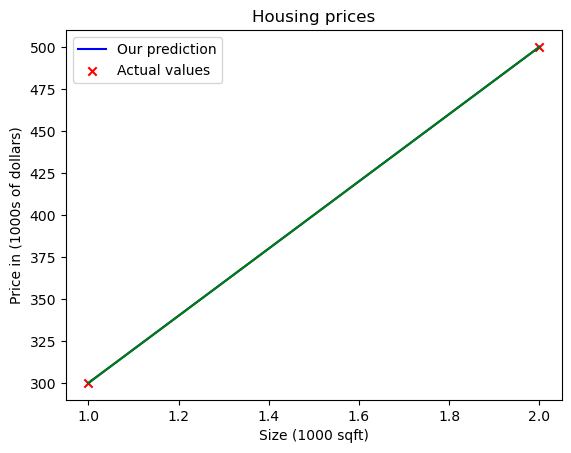

In [25]:
plt.plot(x_train, tmp_f_wb,c='b',label='Our prediction')
plt.scatter(x_train, y_train, marker = 'x',c='r',label='Actual values')
plt.plot(x_train, y_train,c='g')
plt.title("Housing prices")
plt.ylabel("Price in (1000s of dollars)")
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

In [26]:
w = 200
b = 100
x_i = 1.2
cost_1200_sqft = w * x_i + b
print(f"{cost_1200_sqft:.0f} thousand dollars")

340 thousand dollars


The function is represented as: 
    $f(x)$ = $wx$ + $b$

Linear regression builds a model which establishes a relationship between features and targets. 
- In the example above, the feature was house size and the target was house price
- Once a model's parameters $w$ and $b$ have been determined, the model can be used to make predictions on novel data

### The cost function

The cost function is used to compute the squared error between the predicted values and the true values in a regression model.

The cost function $J(w,b)$ must be minimised as much as possible in order to get a good fit of the regession model.

Remember that $w$ and $b$ are the models parameters, where $w$ is the slope/gradient and $b$ is the y-intercept, 
hence adjusting the $w$ and the $b$ leads to a different value of the predicted value $\hat{y}$.

The cost function takes the prediction $\hat{y}$ and compares it to the target $y$ i.e $\hat{y}$ - $y$, to get the error.

The cost function can be written as: 
    $J_{(w,b)}$ = $\frac{1}{2m} \sum \limits _{i=1} ^ m (\hat{y}^{(i)} - y^{(i)})^2$
    
This is called the squared error function, which can be re-written as: 

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 1} ^ m (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

More mathematical representations:

$$\int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}$$

### Gradient Descent

Gradient descent is an algorithm that is used to compute the $w$ and $b$ parameters of the cost function, and
can be applied in a wide-array of machine learning models.

The gradient descent is used to compute the optimal values of $w$ and $b$ that minimizes the cost function, minimizing the
cost function leads to what is known as local minima.

In gradient descent, the parameter $\tilde{w}$ is computed as :
    $ \tilde{w}$ = $w - \alpha \frac{d}{dw} (J_{w,b})$
    
  - Where $\frac{d}{dw} (J_{w,b})$ is known as the derivative
  - $\alpha$ is known as the learning rate
    
If the learning rate $\alpha$ is small then the learning rate/descent happens slowly or with small steps

If the learning rate $\alpha$ is large, then the learning rate/descent happens faster but may lead to a divergence rather than convergence towards the minima

The parameter $b$ is computed as :
    $ \tilde{b}$ = $b - \alpha \frac{d}{db} (J_{w,b})$
    
The parameters $b$ and $w$  are updated simultaneously.

The learning rate $\alpha$ is always a positive number, so if we have a positive derivative, then the parameter $w$ will be decreasing, and vice-versa.

The derivative term computes the gradient/slope at the point where $w$ is a tangent to the cost function curve, which leads to getting closer and closer to the local/global minima.

#### The learning rate $\alpha$

The choice of the learning rate $\alpha$ is very important in gradient descent.

If the learning rate is too small, then the descent would be too slow. If is is too large, the descent overshoots and the 
algorithm may never reach minimum/convergence.

A gradient descent that uses the entire training dataset to get to the global minima is known as batch gradient descent.

A gradient descent that uses a subset of the dataset is known as stochastic gradient descent.

From the equations above:
    
$\tilde{w}$ = $w - \alpha \frac{d}{dw} (J_{w,b})$

Hence: $\alpha \frac{d}{dw} (J_{w,b})$ = $\frac{1}{m} \sum^{m} \limits_{i=1}(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}$

And 

$\tilde{b}$ = $b - \alpha \frac{d}{db} (J_{w,b})$

Hence: $\alpha \frac{d}{db} (J_{w,b})$ = $\frac{1}{m} \sum^{m} \limits_{i=1}(f_{w,b}(x^{(i)}) - y^{(i)})$

Remember, the derivatives parts of computing the $\tilde{w}$ and $\tilde{b}$ is actually a partial derivative in calculus terms i.e

$\frac{d}{dw} (J_{w,b})$ = $\frac{\partial J(w,b)}{\partial w}$

And: 
    
$\frac{d}{db} (J_{w,b})$ = $\frac{\partial J(w,b)}{\partial b}$

The derivative terms above, compute the gradient/slope of the cost with respect to $w$ and $b$

These are the steps I us to compute the gradient descent: 
- Compute the gradients at $w$ and $b$ by computing their partial derivatives
- Initialize the parameters $w$ and $b$
- Compute the gradient descent and update $w$ and $b$ simultaneously


In [36]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

##### Computing the gradients (by computing the derivaties of $w$ and $b$)

In [37]:
def compute_gradient(x,y, w, b):
    """
    Computes the gradient of w and b 
    Args:
        x (ndarray (m,)): Data, m samples
        y (ndarray (m, )): Target values
        w, b (scalar): model parameters
    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t w
        dj_db (scalar): The gradient of the cost w.r.t b
        
    """
    
    m = x.shape[0].
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb -y[i])
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

##### Computing the gradient descent


In [38]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters,cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters
    gradient steps with learning rate alpha
    
    Args: 
        x (ndarray (m, )): Data, m examples
        y (ndarray (m, )): Target values
        w_in, b_in: initial values of the model parameters
        alpha (float): learning rate
        num_iters: number of iterations to run the gradient descent
        cost_function: function to call to return the cost
        gradient_function: function to call to return the gradient 
        
    Returns: 
    w (scalar): Updated value of parameter after running gradient descent
    b (scalar): Updated value of parameter after running gradient descent
    J_history (List): History of cost values
    p_history (List): History of parameters w and b
    """
    
    w = w_in
    b = b_in
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        # Calculate the gradient and update the paramets using gradient descent
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        ## Update the parameters simultaneously
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        ## Save the cost J at each iteration
        if i < 10000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
            
        ## print cost every intervals 10 times or more if i < 10
        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history   ## return values for graphing    
            
    

In [42]:
w_int = 0
b_int = 0
iterations = 10000
tmp_alpha = 1.0e-2

## run the gradient descent

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_int, b_int,tmp_alpha, iterations, compute_cost, compute_gradient)


print(f"(w,b) found by gradient descent : ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02  w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01  w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01  w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01  w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02  w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02  w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02  w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03  w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03  w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03  w:  2.000e+02, b: 1.00024e+02
(w,b) foun

From the output above, we can see that the cost reduces with more and more iterations

#### Comparing cost versus iterations in Gradient Descent

Text(0.5, 0, 'Iteration Step')

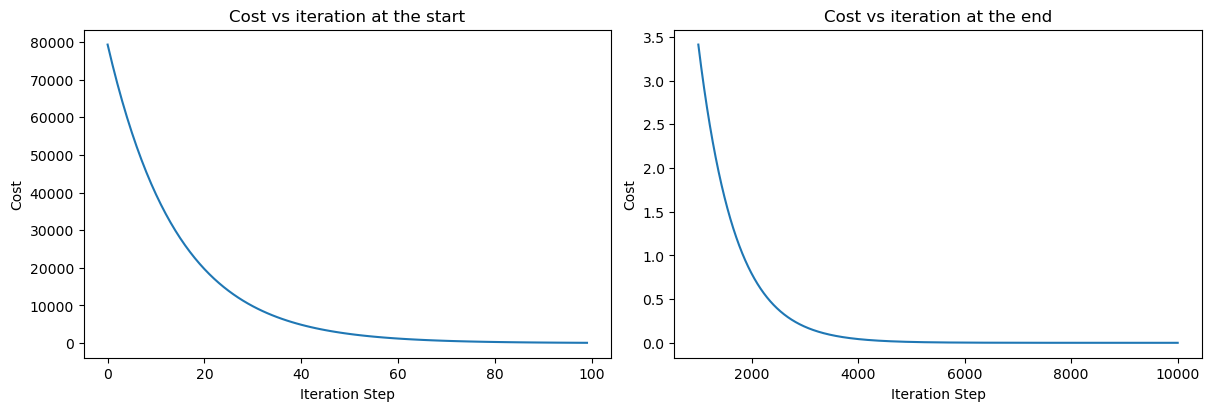

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs iteration at the start")
ax2.set_title("Cost vs iteration at the end")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration Step")
ax2.set_xlabel("Iteration Step")

### Predictions

With the optimal values of $w$ and $b$, we can now compute the predictions for the house prices

In [47]:
print(f"1000 sqft house predictin {w_final * 1.0 + b_final:0.1f} Thousand dollars")
print(f"12000 sqft house predictin {w_final * 1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house predictin {w_final * 2.0 + b_final:0.1f} Thousand dollars")



1000 sqft house predictin 300.0 Thousand dollars
12000 sqft house predictin 340.0 Thousand dollars
2000 sqft house predictin 500.0 Thousand dollars


In [12]:
##### highlighting a dataframe
import numpy as np
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


# Implementing Gradient descent for multiple features

In [48]:
X_train = np.array([[2104, 5, 1, 45],[1416, 3, 2, 40],[852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

The training features/examples are stored in a Numpy matrix X_train, where each row represents one example. 

When you have m training examples, and n features, then **X** is a matrix with dimensions $(m,n)$ i.e m rows and n columns

$w$ in this multiple linear regression is a vector, containing n elements, in this case 4, and is a column vector represented as:
    
$$\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\cdots \\
w_{n-1}
\end{pmatrix}
$$

* $b$ is a scalar parameter
    

## Model prediction with Multiple linear regression

The model's prediction with multiple variables is given by: 

$$f_{w,b}(X) = w_0x_0 + w_1x_1 + w_2x_2 + ... + w_{n-1}x_{n-1} +b \tag{1}$$

In [50]:
def predict (x, w, b):
    """
    Single prediction using linear regression
    Args:
        x (ndarray): Shape (n,) training examples
        w (ndarray) : Shape (n,) model parameters
        b: (scalar) model parameter
    Returns: 
        p (scalar): prediction
    """
    
    p = np.dot(x, w) + b
    return p

### Computing cost with multiple features